# knn

In [3]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from math import *
from pylab import *

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()
#print(iris)

In [5]:
x=iris.data
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
print(iris.data.shape)

(150, 4)


In [9]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [10]:
print(iris.target.shape)

(150,)


# knn classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn=KNeighborsClassifier()

In [13]:
target_names: array(['setosa','versicolor','verginica'])

In [14]:
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
knn.predict( [[6.2,2.8,4.8,1.8]])

array([2])

In [16]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)
knn.predict( [[6.2,2.8,4.8,1.8]])

array([2])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [18]:
print(x_train.shape)
print(x_test.shape)

(90, 4)
(60, 4)


In [19]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [20]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)
knn.predict( [[6.2,2.8,4.8,1.8]])

array([2])

In [21]:
import sklearn.metrics as metrics
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [22]:
import sklearn.metrics as metrics
y_pred = knn.predict(x_train)
print(metrics.accuracy_score(y_train,y_pred))

1.0


# k-means clustering

it means feature extracting model

we will have n no of data and

n no of features

based on those features cluster will made

In [23]:
from sklearn.datasets import make_blobs

In [24]:
#data=make_blobs()
data=make_blobs(n_samples=1000, n_features=2,centers=3, cluster_std=3.0, random_state=42)
print(data)

(array([[-6.02976358, -7.65682451],
       [-4.65334108, -5.98223185],
       [ 6.31485957,  2.20118586],
       ...,
       [ 1.79168217,  9.87031588],
       [ 2.81134223,  1.41225577],
       [-8.56613127, -7.50777521]]), array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0,

In [25]:
data[0].shape

(1000, 2)

In [26]:
print([data])

[(array([[-6.02976358, -7.65682451],
       [-4.65334108, -5.98223185],
       [ 6.31485957,  2.20118586],
       ...,
       [ 1.79168217,  9.87031588],
       [ 2.81134223,  1.41225577],
       [-8.56613127, -7.50777521]]), array([2, 2, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0,
       2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0

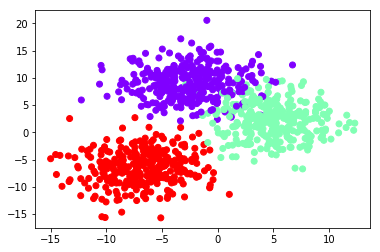

In [27]:
plt.scatter(data[0][:,0],
            data[0][:,1],
            c=data[1],cmap='rainbow')

 # implementing kmeans

In [28]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [29]:
km.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
centers=km.cluster_centers_
print(centers)

[[ 5.02723414  2.07829487]
 [-6.84334685 -6.65945898]
 [-2.58342859  8.99160639]]


In [31]:
km.labels_

array([1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1,
       2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2,
       1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1,
       2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1,
       2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1,
       0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0,
       0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0,
       1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2,
       2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1,

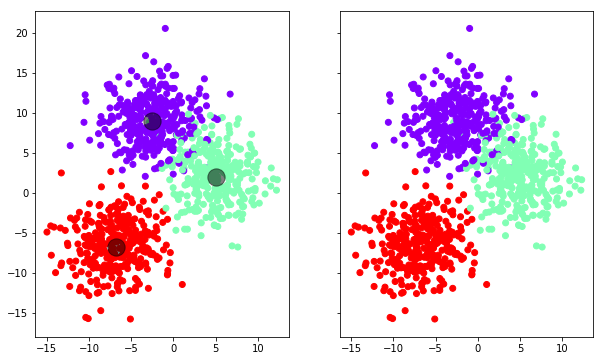

In [32]:
f, (ax1, ax2) = plt.subplots(nrows=1,
                            ncols=2,
                            sharey=True,figsize=(10,6))

ax1.scatter(data[0][:,0],
            data[0][:,1],
            c=data[1],cmap='rainbow')

ax2.scatter(data[0][:,0],
            data[0][:,1],
            c=data[1],cmap='rainbow')

ax1.scatter(x=centers[:,0],
            y=centers[:,1],
            c='black',
            s=300,
            alpha=0.5)

In [33]:
sum_square = {}

for k in range (1,10):
    km= KMeans(n_clusters=k).fit(data[0])
    sum_square[k] = km.inertia_

In [34]:
print(sum_square)

{1: 81789.85809026912, 2: 34265.06667081404, 3: 16681.678320432628, 4: 14269.408047691382, 5: 12463.321387937012, 6: 10554.834329885112, 7: 9371.085089238033, 8: 8245.594413862844, 9: 7301.505703308651}


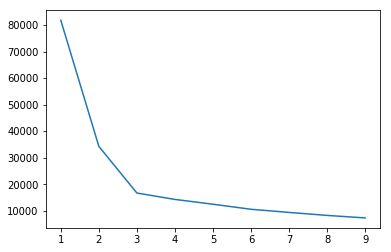

In [40]:
plt.plot(list(sum_square.keys()),(list(sum_square.values())))